# Postdam PM2.5 Deep Learning Forecasting 

* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [1]:
#pip install tensorflow==2.15.0

In [2]:
#pip install keras-tuner==1.4.6 

In [3]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [4]:
import model_base as mb
import deep_learning as dl


# %env TF_ENABLE_ONEDNN_OPTS=0
# print(os.environ["TF_ENABLE_ONEDNN_OPTS"])
# oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable

## Data Exploration

* Load Data


In [5]:
df_hourly, df_daily, df_weekly, df_monthly = mb.read_date_freq()

# Artificial Neural Network (ANN)

An Artificial Neural Network (ANN) is a computational model based on the structure and functions of biological neural networks. Information flows through networks of interconnected nodes, or neurons, each processing input and passing their output to the next layer. These networks are capable of learning complex patterns using algorithms that adjust connections between neurons based on the input data.

ANNs consist of input, hidden, and output layers. The hidden layers can perform nonlinear transformations on the inputs, allowing ANNs to model complex relationships. They're applied in various fields like image and speech recognition, natural language processing, and predictive analytics.

Comparatively, a Recurrent Neural Network (RNN) is specialized for processing sequences, capturing temporal dependencies by using loops within the network. However, standard RNNs struggle with long-term dependencies due to issues like vanishing gradients.

Long Short-Term Memory (LSTM) networks are a type of RNN designed to overcome this limitation. They include mechanisms called gates that regulate the flow of information and allow the network to retain or discard data over long sequences, making them more effective for tasks like time series analysis and language modeling.

Convolutional Neural Networks (CNNs) are another specialized kind of ANN designed for grid-like data, such as images. CNNs employ filters to perform convolution operations that capture spatial hierarchies and features, making them powerful for image and video recognition tasks.

Each type of network—ANN, RNN, LSTM, and CNN—serves different purposes and excels in different applications, from the general pattern recognition of ANNs to the nuanced temporal or spatial data handling in RNNs, LSTMs, and CNNs, respectively.


* Best Model Train and Evolve 
* Hyperparamater with Keras-Tuner

{'Total Data Points': 87648, 'Training Data Size': 52573, 'Validation Data Size': 17524, 'Testing Data Size': 17526}
{'learning_rate': 0.0062012831694498545, 'num_layers': 5, 'units': [64, 64, 288, 32, 512], 'activations': ['tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10


2023-12-27 23:43:10.934829: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-27 23:43:10.934854: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-27 23:43:10.934857: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-27 23:43:10.935066: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-27 23:43:10.935293: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-12-27 23:43:11.465287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1643/1643 [==============================] - ETA: 0s - loss: 0.0052 - mean_absolute_error: 0.0375INFO:tensorflow:Assets written to: ann_model_H/assets


INFO:tensorflow:Assets written to: ann_model_H/assets


1643/1643 [==============================] - 13s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0375 - val_loss: 0.0017 - val_mean_absolute_error: 0.0262
Epoch 2/10
1637/1643 [============================>.] - ETA: 0s - loss: 0.0017 - mean_absolute_error: 0.0256INFO:tensorflow:Assets written to: ann_model_H/assets


INFO:tensorflow:Assets written to: ann_model_H/assets


1643/1643 [==============================] - 11s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0256 - val_loss: 0.0015 - val_mean_absolute_error: 0.0238
Epoch 3/10
1643/1643 [==============================] - 11s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0285 - val_loss: 0.0018 - val_mean_absolute_error: 0.0278
Epoch 4/10
1643/1643 [==============================] - 11s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0264 - val_loss: 0.0019 - val_mean_absolute_error: 0.0298
Epoch 5/10
1643/1643 [==============================] - 11s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0257 - val_loss: 0.0020 - val_mean_absolute_error: 0.0291
Epoch 6/10
1643/1643 [==============================] - 11s 7ms/step - loss: 0.0910 - mean_absolute_error: 0.0720 - val_loss: 0.1138 - val_mean_absolute_error: 0.2747
Epoch 7/10
1643/1643 [==============================] - 11s 6ms/step - loss: 0.0658 - mean_absolute_error: 0.1832 - val_loss: 0.1348 - val_mean_absolute_error: 0.3116
Epoch 8/1

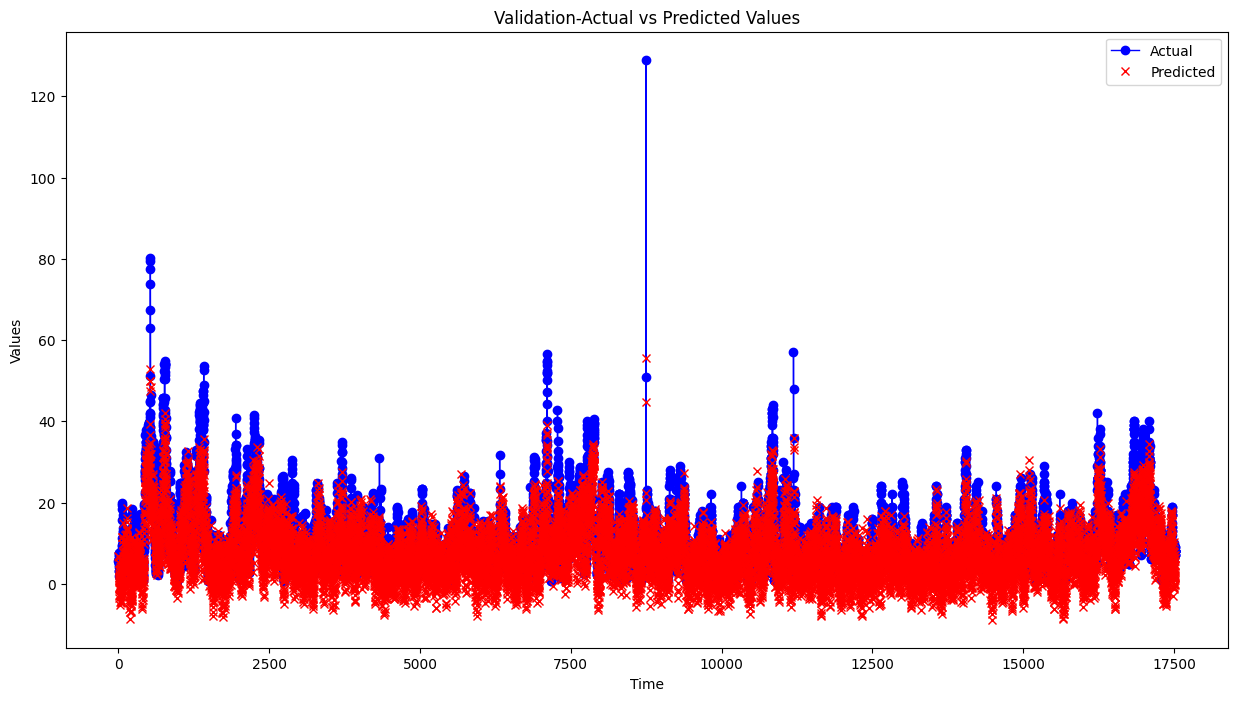

MAE: 4.2525
MSE: 30.2860
RMSE: 5.5033
MAPE: 4.0420
MASE: 1.0922679407727724
548/548 [==============================] - 1s 2ms/step


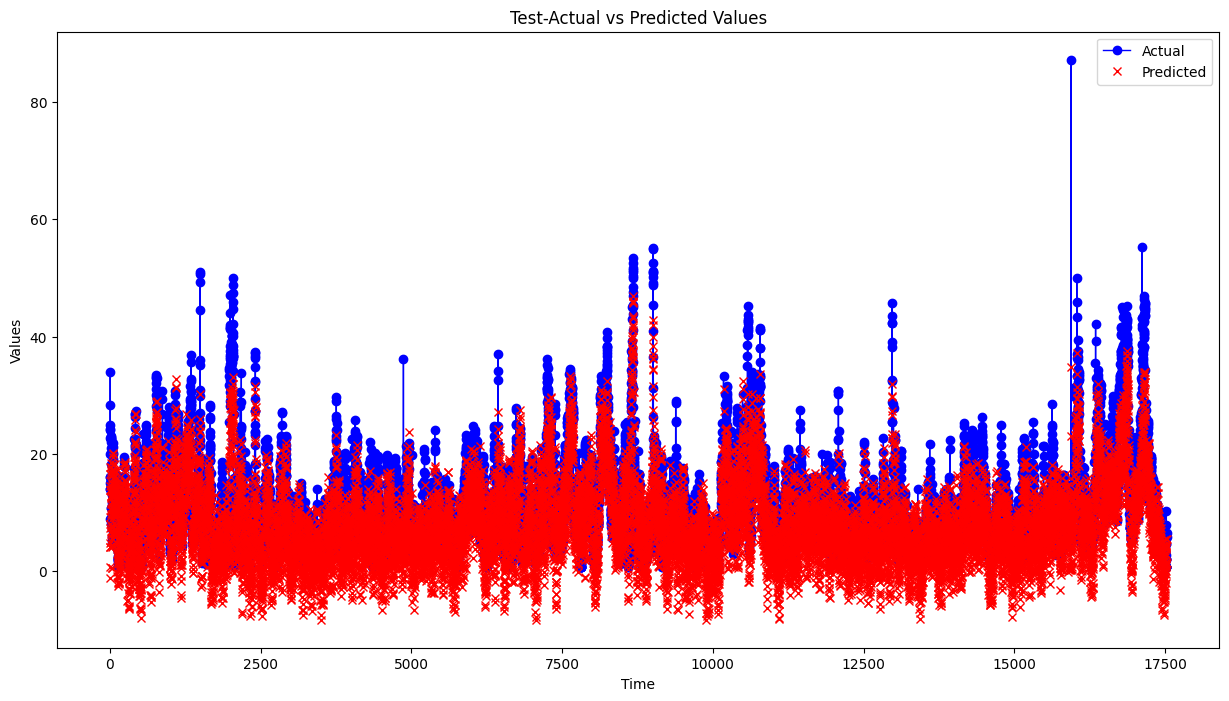

MAE: 4.3626
MSE: 31.1140
RMSE: 5.5780
MAPE: 3.9392
MASE: 1.1213072416038514
{'Total Data Points': 3652, 'Training Data Size': 2172, 'Validation Data Size': 724, 'Testing Data Size': 725}
{'learning_rate': 0.00047719719927521065, 'num_layers': 5, 'units': [256, 160, 384, 96, 32], 'activations': ['tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
68/68 [==============================] - ETA: 0s - loss: 0.0559 - mean_absolute_error: 0.1765INFO:tensorflow:Assets written to: ann_model_D/assets


INFO:tensorflow:Assets written to: ann_model_D/assets


68/68 [==============================] - 1s 14ms/step - loss: 0.0559 - mean_absolute_error: 0.1765 - val_loss: 0.0114 - val_mean_absolute_error: 0.0795
Epoch 2/10
68/68 [==============================] - ETA: 0s - loss: 0.0255 - mean_absolute_error: 0.1232INFO:tensorflow:Assets written to: ann_model_D/assets


INFO:tensorflow:Assets written to: ann_model_D/assets


68/68 [==============================] - 1s 13ms/step - loss: 0.0255 - mean_absolute_error: 0.1232 - val_loss: 0.0088 - val_mean_absolute_error: 0.0700
Epoch 3/10
62/68 [==========================>...] - ETA: 0s - loss: 0.0211 - mean_absolute_error: 0.1115INFO:tensorflow:Assets written to: ann_model_D/assets


INFO:tensorflow:Assets written to: ann_model_D/assets


68/68 [==============================] - 1s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.1116 - val_loss: 0.0087 - val_mean_absolute_error: 0.0683
Epoch 4/10
63/68 [==========================>...] - ETA: 0s - loss: 0.0192 - mean_absolute_error: 0.1062INFO:tensorflow:Assets written to: ann_model_D/assets


INFO:tensorflow:Assets written to: ann_model_D/assets


68/68 [==============================] - 1s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.1059 - val_loss: 0.0072 - val_mean_absolute_error: 0.0601
Epoch 5/10
67/68 [============================>.] - ETA: 0s - loss: 0.0172 - mean_absolute_error: 0.0998INFO:tensorflow:Assets written to: ann_model_D/assets


INFO:tensorflow:Assets written to: ann_model_D/assets


68/68 [==============================] - 1s 13ms/step - loss: 0.0172 - mean_absolute_error: 0.0997 - val_loss: 0.0062 - val_mean_absolute_error: 0.0524
Epoch 6/10
68/68 [==============================] - 0s 7ms/step - loss: 0.0157 - mean_absolute_error: 0.0953 - val_loss: 0.0063 - val_mean_absolute_error: 0.0567
Epoch 7/10
68/68 [==============================] - 0s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0938 - val_loss: 0.0084 - val_mean_absolute_error: 0.0664
Epoch 8/10
68/68 [==============================] - 0s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0896 - val_loss: 0.0066 - val_mean_absolute_error: 0.0540
Epoch 9/10
61/68 [=========================>....] - ETA: 0s - loss: 0.0130 - mean_absolute_error: 0.0856INFO:tensorflow:Assets written to: ann_model_D/assets


INFO:tensorflow:Assets written to: ann_model_D/assets


68/68 [==============================] - 1s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0856 - val_loss: 0.0060 - val_mean_absolute_error: 0.0521
Epoch 10/10
68/68 [==============================] - 0s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0847 - val_loss: 0.0068 - val_mean_absolute_error: 0.0587
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 270)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               69376     
                                                                 
 dense_7 (Dense)             (None, 160)               41120     
                                                                 
 dense_8 (Dense)             (None, 384)               61824     
                                                                 
 de

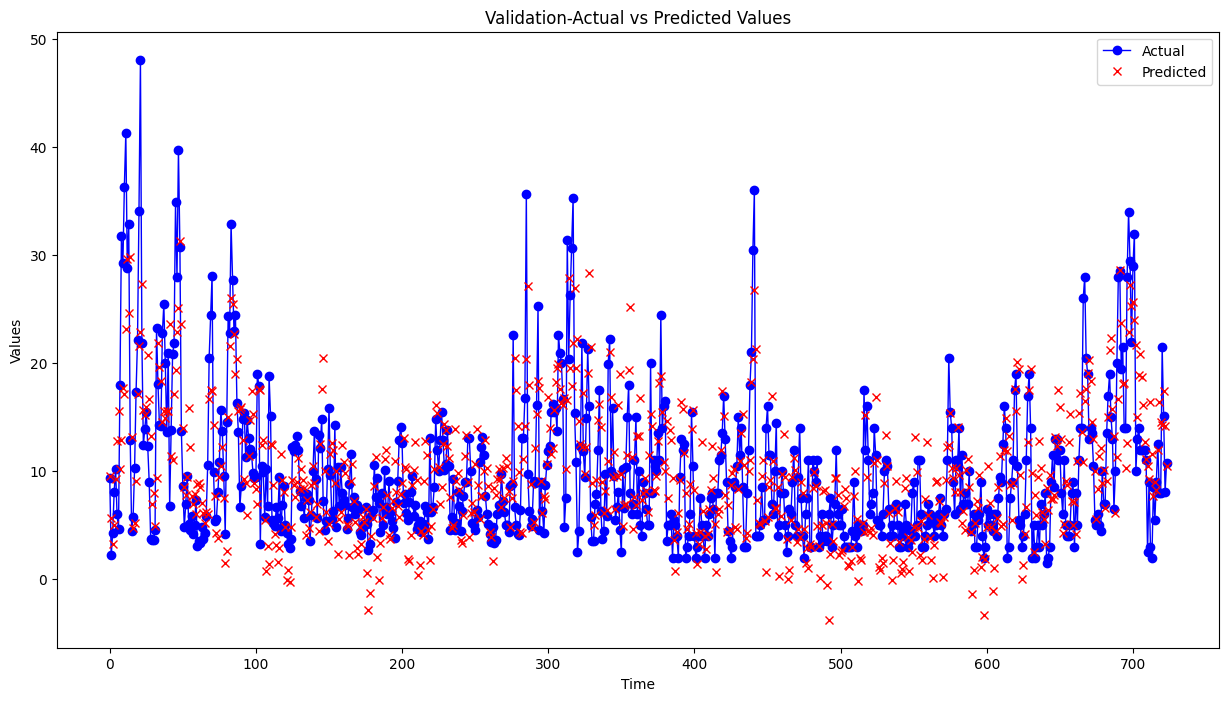

MAE: 4.2947
MSE: 32.3841
RMSE: 5.6907
MAPE: 1.9212
MASE: 1.2450600913060208
23/23 [==============================] - 0s 2ms/step


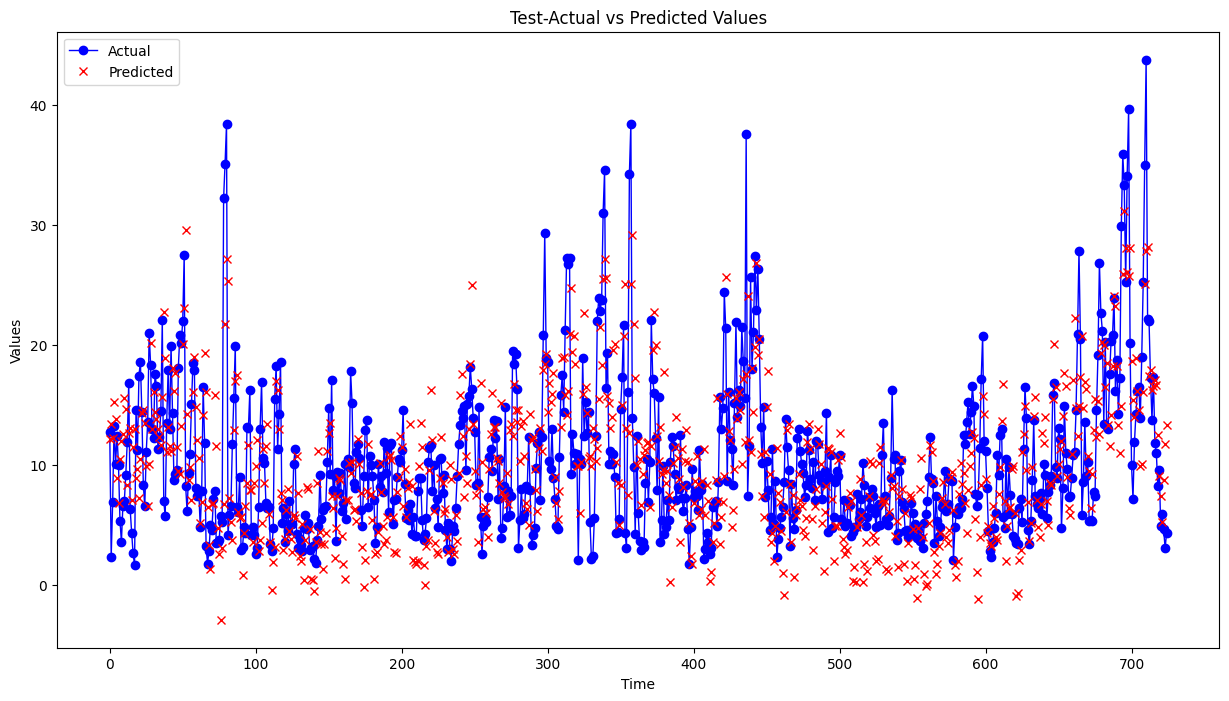

MAE: 4.3863
MSE: 32.7512
RMSE: 5.7229
MAPE: 1.2899
MASE: 1.2938970086108121
{'Total Data Points': 522, 'Training Data Size': 281, 'Validation Data Size': 93, 'Testing Data Size': 95}
{'learning_rate': 0.0007015644123562024, 'num_layers': 4, 'units': [160, 160, 128, 416], 'activations': ['tanh', 'tanh', 'tanh', 'tanh'], 'dropout': False}
Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 0.0996 - mean_absolute_error: 0.2323INFO:tensorflow:Assets written to: ann_model_W/assets


INFO:tensorflow:Assets written to: ann_model_W/assets


9/9 [==============================] - 1s 60ms/step - loss: 0.0996 - mean_absolute_error: 0.2323 - val_loss: 0.0412 - val_mean_absolute_error: 0.1594
Epoch 2/10
1/9 [==>...........................] - ETA: 0s - loss: 0.0329 - mean_absolute_error: 0.1423INFO:tensorflow:Assets written to: ann_model_W/assets


INFO:tensorflow:Assets written to: ann_model_W/assets


9/9 [==============================] - 0s 42ms/step - loss: 0.0273 - mean_absolute_error: 0.1300 - val_loss: 0.0387 - val_mean_absolute_error: 0.1548
Epoch 3/10
6/9 [===================>..........] - ETA: 0s - loss: 0.0212 - mean_absolute_error: 0.1121INFO:tensorflow:Assets written to: ann_model_W/assets


INFO:tensorflow:Assets written to: ann_model_W/assets


9/9 [==============================] - 0s 53ms/step - loss: 0.0196 - mean_absolute_error: 0.1080 - val_loss: 0.0364 - val_mean_absolute_error: 0.1462
Epoch 4/10
9/9 [==============================] - ETA: 0s - loss: 0.0161 - mean_absolute_error: 0.0966INFO:tensorflow:Assets written to: ann_model_W/assets


INFO:tensorflow:Assets written to: ann_model_W/assets


9/9 [==============================] - 0s 47ms/step - loss: 0.0161 - mean_absolute_error: 0.0966 - val_loss: 0.0268 - val_mean_absolute_error: 0.1187
Epoch 5/10
1/9 [==>...........................] - ETA: 0s - loss: 0.0223 - mean_absolute_error: 0.0996INFO:tensorflow:Assets written to: ann_model_W/assets


INFO:tensorflow:Assets written to: ann_model_W/assets


9/9 [==============================] - 1s 63ms/step - loss: 0.0123 - mean_absolute_error: 0.0801 - val_loss: 0.0257 - val_mean_absolute_error: 0.1135
Epoch 6/10
1/9 [==>...........................] - ETA: 0s - loss: 0.0081 - mean_absolute_error: 0.0664INFO:tensorflow:Assets written to: ann_model_W/assets


INFO:tensorflow:Assets written to: ann_model_W/assets


9/9 [==============================] - 0s 43ms/step - loss: 0.0107 - mean_absolute_error: 0.0726 - val_loss: 0.0237 - val_mean_absolute_error: 0.1096
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0732 - val_loss: 0.0271 - val_mean_absolute_error: 0.1207
Epoch 8/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0695 - val_loss: 0.0242 - val_mean_absolute_error: 0.1116
Epoch 9/10
1/9 [==>...........................] - ETA: 0s - loss: 0.0078 - mean_absolute_error: 0.0645INFO:tensorflow:Assets written to: ann_model_W/assets


INFO:tensorflow:Assets written to: ann_model_W/assets


9/9 [==============================] - 0s 43ms/step - loss: 0.0092 - mean_absolute_error: 0.0678 - val_loss: 0.0212 - val_mean_absolute_error: 0.1009
Epoch 10/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0737 - val_loss: 0.0270 - val_mean_absolute_error: 0.1222
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 468)               0         
                                                                 
 dense_12 (Dense)            (None, 160)               75040     
                                                                 
 dense_13 (Dense)            (None, 160)               25760     
                                                                 
 dense_14 (Dense)            (None, 128)               20608     
                                                                 
 dense_

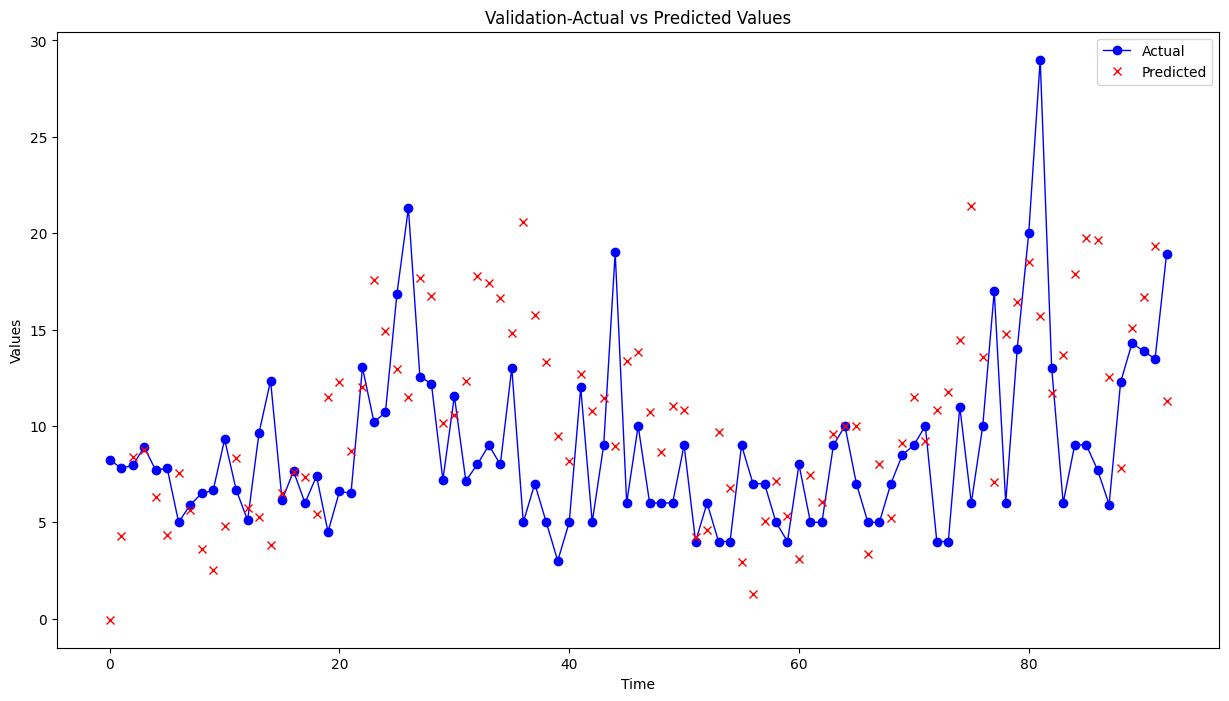

MAE: 4.4839
MSE: 32.5773
RMSE: 5.7077
MAPE: 2.0769
MASE: 1.5013761147621523
3/3 [==============================] - 0s 8ms/step


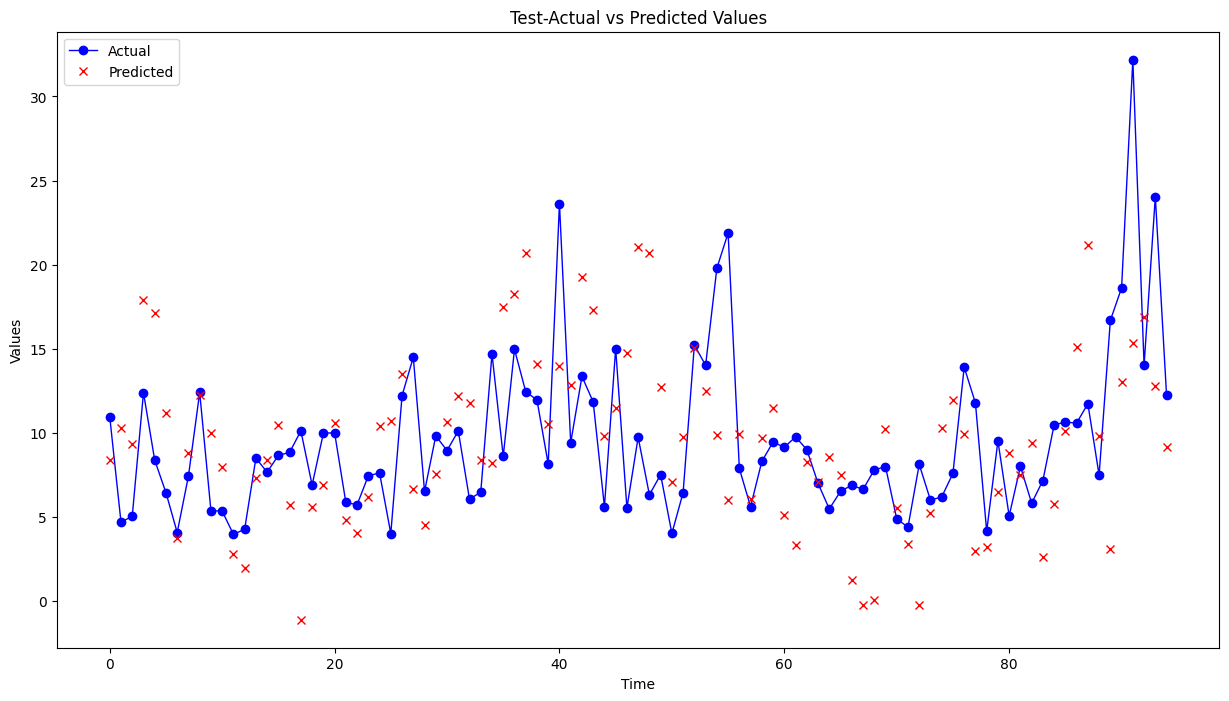

MAE: 4.3162
MSE: 32.0593
RMSE: 5.6621
MAPE: 3.5520
MASE: 1.1537906333428258
{'Total Data Points': 120, 'Training Data Size': 64, 'Validation Data Size': 21, 'Testing Data Size': 22}
{'learning_rate': 0.001753559151044536, 'num_layers': 1, 'units': [288], 'activations': ['tanh'], 'dropout': True}
Epoch 1/10
1/2 [==============>...............] - ETA: 0s - loss: 0.5362 - mean_absolute_error: 0.5202INFO:tensorflow:Assets written to: ann_model_M/assets


INFO:tensorflow:Assets written to: ann_model_M/assets


2/2 [==============================] - 0s 282ms/step - loss: 0.3545 - mean_absolute_error: 0.4268 - val_loss: 0.1490 - val_mean_absolute_error: 0.2951
Epoch 2/10
2/2 [==============================] - 0s 21ms/step - loss: 0.2504 - mean_absolute_error: 0.3832 - val_loss: 0.1697 - val_mean_absolute_error: 0.3361
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 0.1933 - mean_absolute_error: 0.3317INFO:tensorflow:Assets written to: ann_model_M/assets


INFO:tensorflow:Assets written to: ann_model_M/assets


2/2 [==============================] - 0s 198ms/step - loss: 0.1663 - mean_absolute_error: 0.3166 - val_loss: 0.0654 - val_mean_absolute_error: 0.2049
Epoch 4/10
2/2 [==============================] - 0s 20ms/step - loss: 0.1042 - mean_absolute_error: 0.2549 - val_loss: 0.0934 - val_mean_absolute_error: 0.2429
Epoch 5/10
2/2 [==============================] - 0s 22ms/step - loss: 0.1452 - mean_absolute_error: 0.2957 - val_loss: 0.1053 - val_mean_absolute_error: 0.2513
Epoch 6/10
2/2 [==============================] - 0s 21ms/step - loss: 0.1213 - mean_absolute_error: 0.2717 - val_loss: 0.0683 - val_mean_absolute_error: 0.2049
Epoch 7/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0814 - mean_absolute_error: 0.2262INFO:tensorflow:Assets written to: ann_model_M/assets


INFO:tensorflow:Assets written to: ann_model_M/assets


2/2 [==============================] - 0s 197ms/step - loss: 0.0731 - mean_absolute_error: 0.2137 - val_loss: 0.0608 - val_mean_absolute_error: 0.2010
Epoch 8/10
2/2 [==============================] - 0s 20ms/step - loss: 0.0753 - mean_absolute_error: 0.2187 - val_loss: 0.0714 - val_mean_absolute_error: 0.2188
Epoch 9/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0901 - mean_absolute_error: 0.2349INFO:tensorflow:Assets written to: ann_model_M/assets


INFO:tensorflow:Assets written to: ann_model_M/assets


2/2 [==============================] - 0s 223ms/step - loss: 0.0876 - mean_absolute_error: 0.2333 - val_loss: 0.0575 - val_mean_absolute_error: 0.1973
Epoch 10/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0706 - mean_absolute_error: 0.2083INFO:tensorflow:Assets written to: ann_model_M/assets


INFO:tensorflow:Assets written to: ann_model_M/assets


2/2 [==============================] - 0s 206ms/step - loss: 0.0635 - mean_absolute_error: 0.2005 - val_loss: 0.0488 - val_mean_absolute_error: 0.1767
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 108)               0         
                                                                 
 dense_17 (Dense)            (None, 288)               31392     
                                                                 
 dropout_2 (Dropout)         (None, 288)               0         
                                                                 
 dense_18 (Dense)            (None, 9)                 2601      
                                                                 
Total params: 33993 (132.79 KB)
Trainable params: 33993 (132.79 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________________________________________________

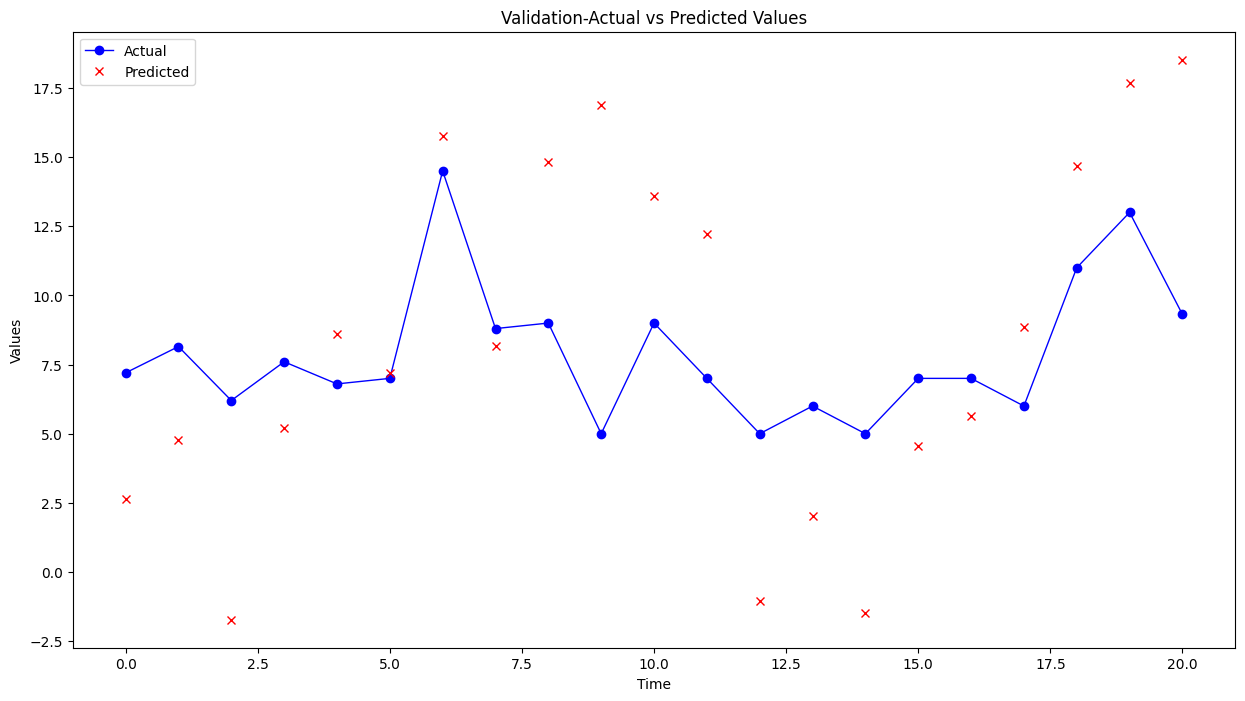

MAE: 4.3049
MSE: 26.6591
RMSE: 5.1632
MAPE: 1.1418
MASE: 0.9597867795559872
1/1 [==============================] - 0s 16ms/step


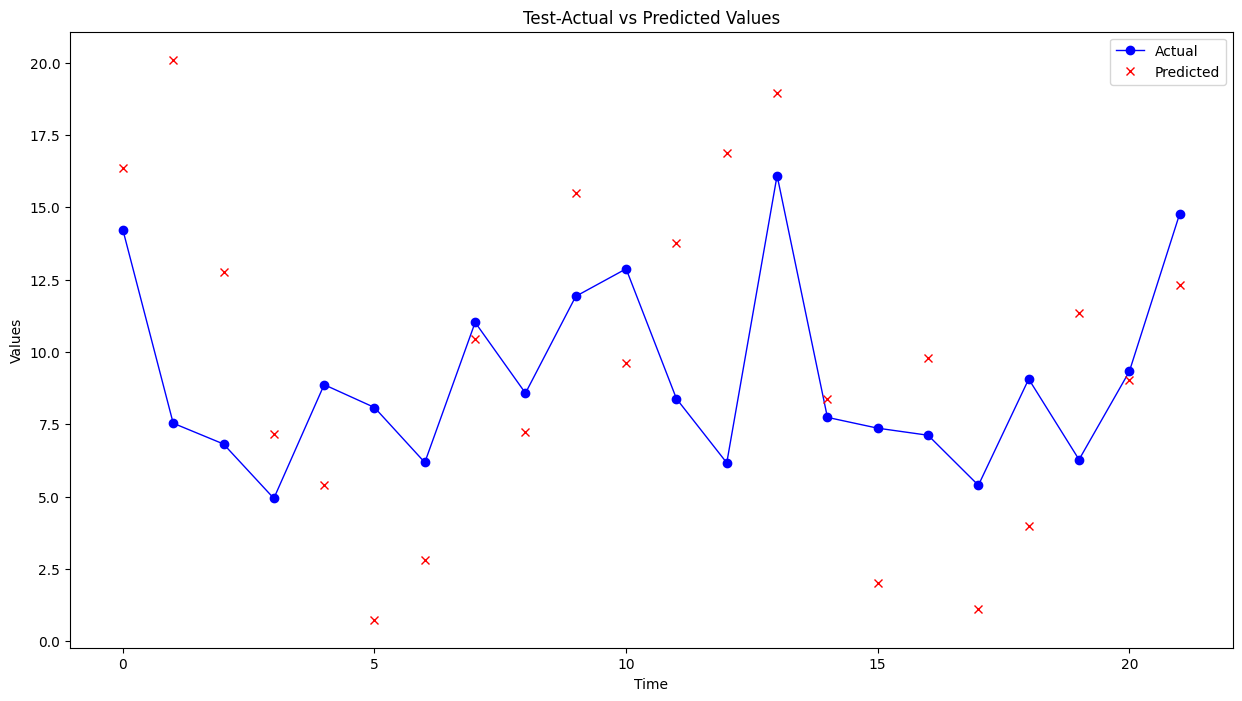

MAE: 4.1181
MSE: 25.8973
RMSE: 5.0889
MAPE: 1.0939
MASE: 0.7953972284109276


In [6]:
# # Train and Evolve

# Hourly
dl.ann_train_and_evaluate(df_hourly)

# Daily
dl.ann_train_and_evaluate(df_daily, 'D')

# Weekly
dl.ann_train_and_evaluate(df_weekly, 'W')

# Monthly
dl.ann_train_and_evaluate(df_monthly, 'M')


In [7]:
# Hyperparamater Tuning 

# # Hourly
# hourly_best_model, hourly_best_hp = dl.ann_tune_and_evolve(df_hourly)

In [8]:
# # Daily
# daily_best_model, daily_best_hp = dl.ann_tune_and_evolve(df_daily, 'D')

In [9]:

# # Weekly
# weekly_best_model, weekly_best_hp = dl.ann_tune_and_evolve(df_weekly, 'W')

In [10]:

# Monthly
# monthly_best_model, monthly_best_hp = dl.ann_tune_and_evolve(df_monthly, 'M')

# LSTM

* Best Model Train and Evolve 
* Hyperparamater with Keras-Tuner

{'Total Data Points': 87648, 'Training Data Size': 52573, 'Validation Data Size': 17524, 'Testing Data Size': 17526}
{'learning_rate': 0.00019153080222192724, 'num_layers': 2, 'units': [448, 224], 'activations': ['tanh', 'tanh'], 'dropout': False}
Epoch 1/10
1643/1643 [==============================] - ETA: 0s - loss: 0.0054 - mean_absolute_error: 0.0314INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 27s 16ms/step - loss: 0.0054 - mean_absolute_error: 0.0314 - val_loss: 0.0016 - val_mean_absolute_error: 0.0180
Epoch 2/10
1643/1643 [==============================] - ETA: 0s - loss: 0.0015 - mean_absolute_error: 0.0167INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 26s 16ms/step - loss: 0.0015 - mean_absolute_error: 0.0167 - val_loss: 9.6806e-04 - val_mean_absolute_error: 0.0138
Epoch 3/10
1643/1643 [==============================] - 23s 14ms/step - loss: 0.0010 - mean_absolute_error: 0.0138 - val_loss: 0.0010 - val_mean_absolute_error: 0.0134
Epoch 4/10
1640/1643 [============================>.] - ETA: 0s - loss: 9.3314e-04 - mean_absolute_error: 0.0125INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 25s 15ms/step - loss: 9.3238e-04 - mean_absolute_error: 0.0125 - val_loss: 7.9546e-04 - val_mean_absolute_error: 0.0113
Epoch 5/10
1641/1643 [============================>.] - ETA: 0s - loss: 8.7485e-04 - mean_absolute_error: 0.0116INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 24s 15ms/step - loss: 8.7447e-04 - mean_absolute_error: 0.0116 - val_loss: 7.8105e-04 - val_mean_absolute_error: 0.0109
Epoch 6/10
1641/1643 [============================>.] - ETA: 0s - loss: 8.2600e-04 - mean_absolute_error: 0.0108INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 25s 15ms/step - loss: 8.2547e-04 - mean_absolute_error: 0.0108 - val_loss: 7.4530e-04 - val_mean_absolute_error: 0.0102
Epoch 7/10
1643/1643 [==============================] - ETA: 0s - loss: 8.0194e-04 - mean_absolute_error: 0.0104INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 26s 16ms/step - loss: 8.0194e-04 - mean_absolute_error: 0.0104 - val_loss: 7.2415e-04 - val_mean_absolute_error: 0.0096
Epoch 8/10
1643/1643 [==============================] - 24s 14ms/step - loss: 7.7394e-04 - mean_absolute_error: 0.0100 - val_loss: 7.5850e-04 - val_mean_absolute_error: 0.0098
Epoch 9/10
1640/1643 [============================>.] - ETA: 0s - loss: 7.6070e-04 - mean_absolute_error: 0.0097INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 26s 16ms/step - loss: 7.5994e-04 - mean_absolute_error: 0.0097 - val_loss: 6.8385e-04 - val_mean_absolute_error: 0.0087
Epoch 10/10
548/548 [==============================] - 3s 5ms/step


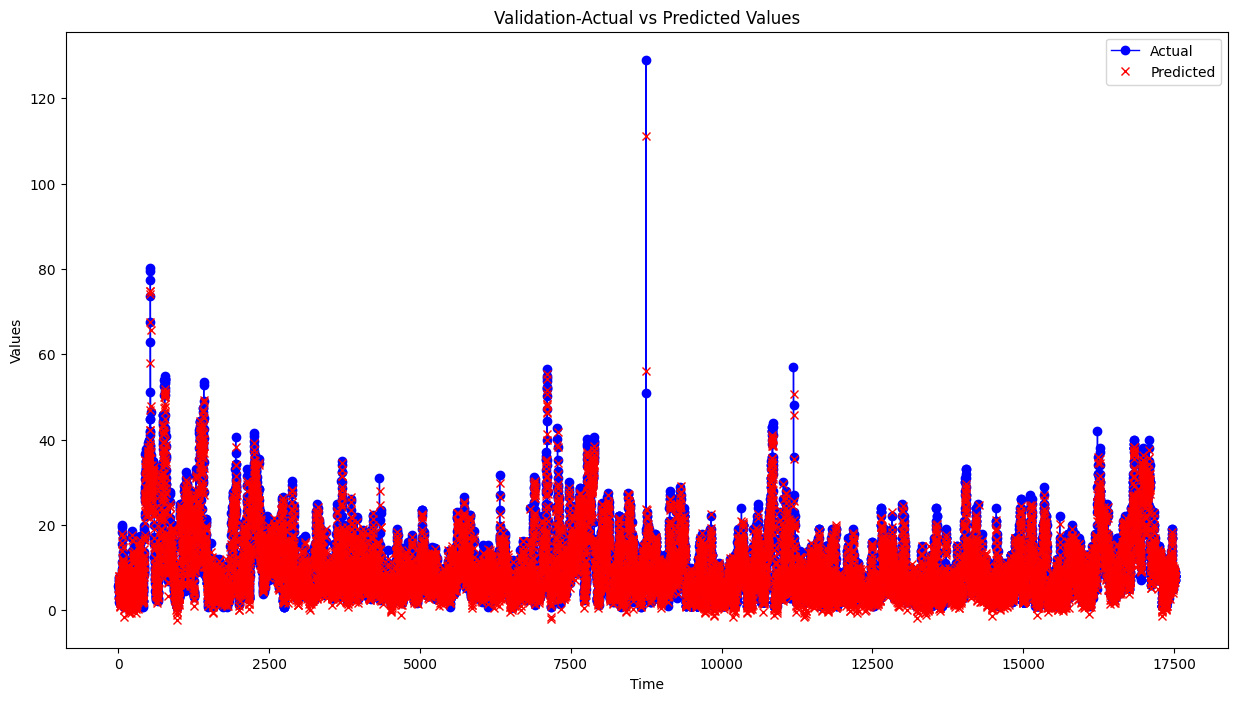

MAE: 1.3279
MSE: 4.5490
RMSE: 2.1328
MAPE: 0.3422
MASE: 1.1454108355788375
548/548 [==============================] - 2s 4ms/step


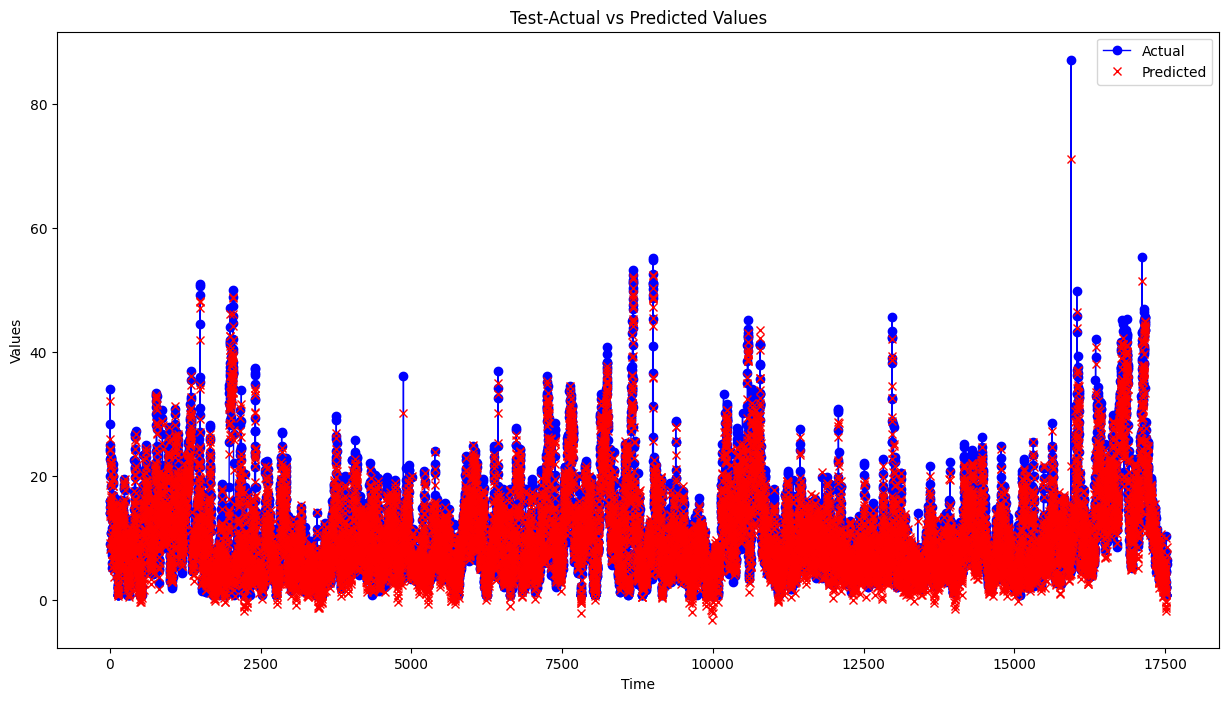

MAE: 1.3522
MSE: 4.2277
RMSE: 2.0561
MAPE: 0.3331
MASE: 1.1626861709978735
{'Total Data Points': 3652, 'Training Data Size': 2172, 'Validation Data Size': 724, 'Testing Data Size': 725}
{'learning_rate': 0.0028652697828724623, 'num_layers': 3, 'units': [480, 384, 288], 'activations': ['tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
68/68 [==============================] - ETA: 0s - loss: 0.0401 - mean_absolute_error: 0.1222INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 3s 40ms/step - loss: 0.0401 - mean_absolute_error: 0.1222 - val_loss: 0.0113 - val_mean_absolute_error: 0.0659
Epoch 2/10
68/68 [==============================] - 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0743 - val_loss: 0.0113 - val_mean_absolute_error: 0.0618
Epoch 3/10
67/68 [============================>.] - ETA: 0s - loss: 0.0124 - mean_absolute_error: 0.0707INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 2s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0706 - val_loss: 0.0103 - val_mean_absolute_error: 0.0635
Epoch 4/10
68/68 [==============================] - 1s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0697 - val_loss: 0.0107 - val_mean_absolute_error: 0.0631
Epoch 5/10
67/68 [============================>.] - ETA: 0s - loss: 0.0110 - mean_absolute_error: 0.0665INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 2s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0664 - val_loss: 0.0079 - val_mean_absolute_error: 0.0539
Epoch 6/10
65/68 [===========================>..] - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.0597INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 2s 32ms/step - loss: 0.0091 - mean_absolute_error: 0.0594 - val_loss: 0.0072 - val_mean_absolute_error: 0.0497
Epoch 7/10
68/68 [==============================] - 1s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0581 - val_loss: 0.0090 - val_mean_absolute_error: 0.0601
Epoch 8/10
68/68 [==============================] - 1s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0571 - val_loss: 0.0077 - val_mean_absolute_error: 0.0558
Epoch 9/10
66/68 [============================>.] - ETA: 0s - loss: 0.0082 - mean_absolute_error: 0.0565INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 3s 37ms/step - loss: 0.0082 - mean_absolute_error: 0.0566 - val_loss: 0.0072 - val_mean_absolute_error: 0.0508
Epoch 10/10
65/68 [===========================>..] - ETA: 0s - loss: 0.0086 - mean_absolute_error: 0.0588INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


23/23 [==============================] - 0s 8ms/step


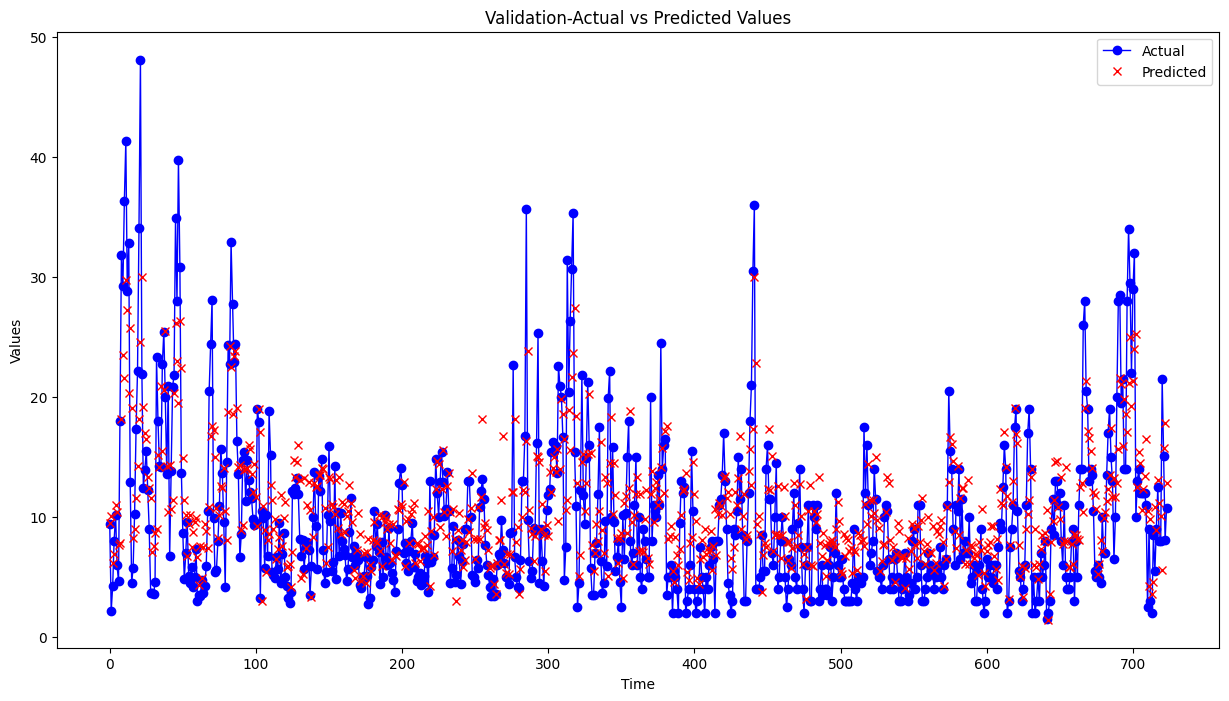

MAE: 3.8143
MSE: 26.0386
RMSE: 5.1028
MAPE: 0.3652
MASE: 1.3480538343273616
23/23 [==============================] - 0s 8ms/step


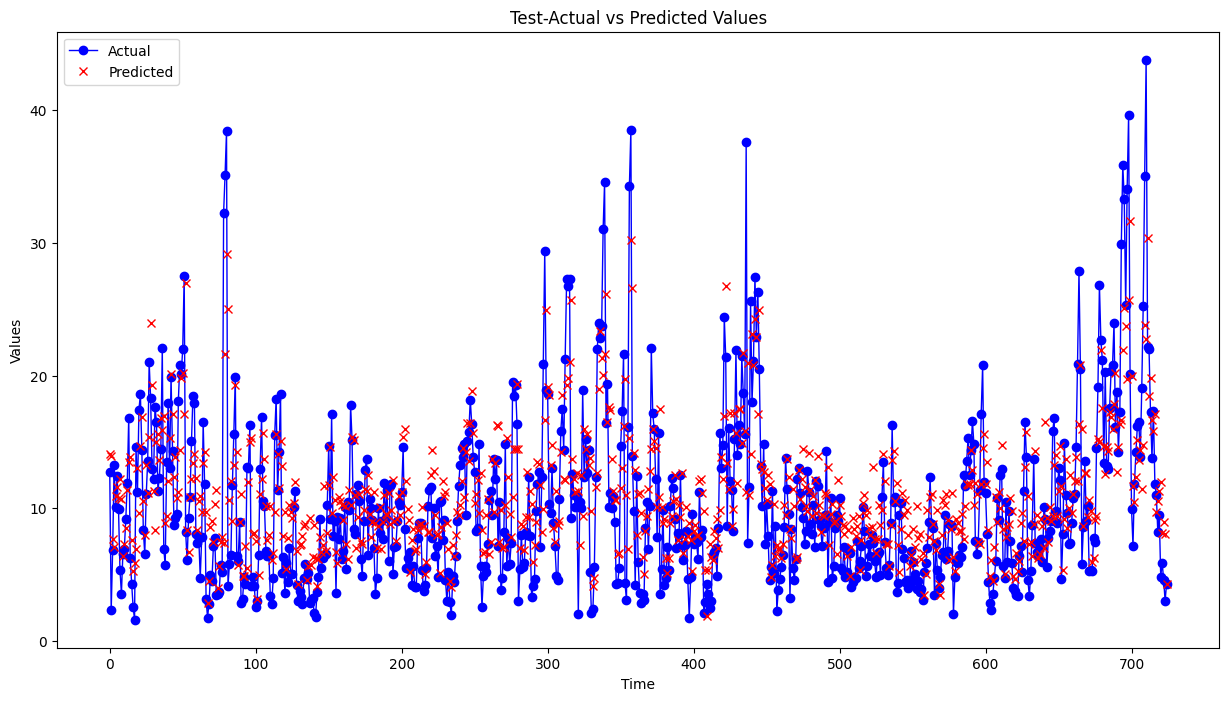

MAE: 3.5419
MSE: 23.2776
RMSE: 4.8247
MAPE: 0.3242
MASE: 1.2818026094118031
{'Total Data Points': 522, 'Training Data Size': 281, 'Validation Data Size': 93, 'Testing Data Size': 95}
{'learning_rate': 0.002737350599350577, 'num_layers': 5, 'units': [416, 192, 448, 448, 192], 'activations': ['tanh', 'relu', 'relu', 'relu', 'relu'], 'dropout': False}
Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 0.1554 - mean_absolute_error: 0.3080INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


9/9 [==============================] - 3s 229ms/step - loss: 0.1554 - mean_absolute_error: 0.3080 - val_loss: 0.0808 - val_mean_absolute_error: 0.2256
Epoch 2/10
9/9 [==============================] - 0s 30ms/step - loss: 0.1349 - mean_absolute_error: 0.2756 - val_loss: 0.1925 - val_mean_absolute_error: 0.3511
Epoch 3/10
9/9 [==============================] - 0s 24ms/step - loss: 0.3086 - mean_absolute_error: 0.4163 - val_loss: 0.4152 - val_mean_absolute_error: 0.5002
Epoch 4/10
9/9 [==============================] - 0s 24ms/step - loss: 0.5728 - mean_absolute_error: 0.5982 - val_loss: 0.3906 - val_mean_absolute_error: 0.4955
Epoch 5/10
9/9 [==============================] - 0s 26ms/step - loss: 1.3393 - mean_absolute_error: 0.9302 - val_loss: 1.7048 - val_mean_absolute_error: 1.0779
Epoch 6/10
9/9 [==============================] - 0s 25ms/step - loss: 0.6478 - mean_absolute_error: 0.5954 - val_loss: 0.5373 - val_mean_absolute_error: 0.5776
Epoch 7/10
9/9 [============================

INFO:tensorflow:Assets written to: lstm_model_W/assets


3/3 [==============================] - 0s 48ms/step


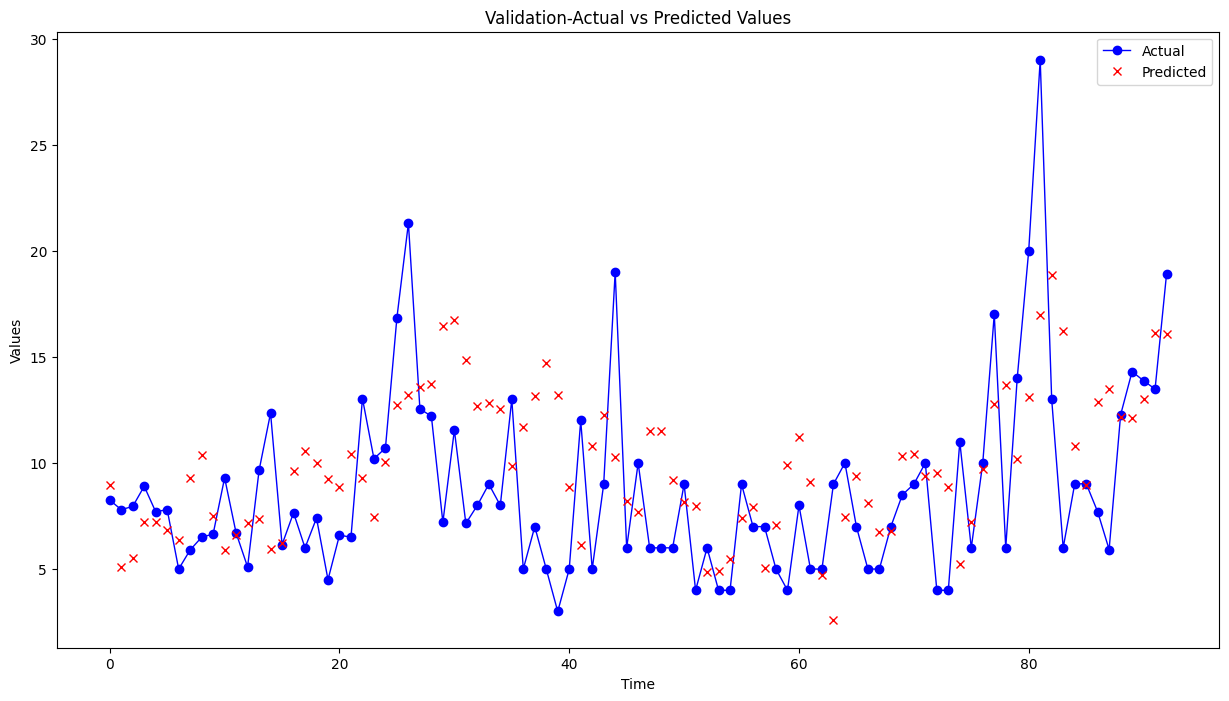

MAE: 3.5761
MSE: 19.8815
RMSE: 4.4589
MAPE: 0.3697
MASE: 2.057135221557178
3/3 [==============================] - 0s 33ms/step


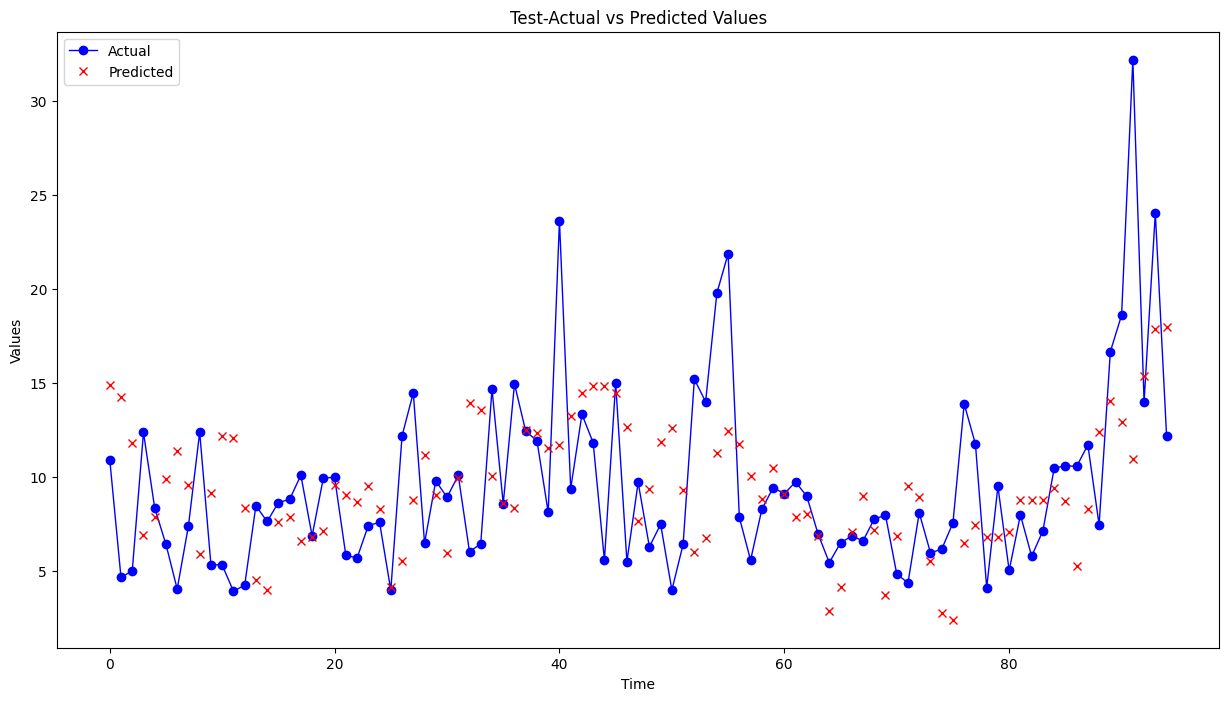

MAE: 3.8256
MSE: 25.3843
RMSE: 5.0383
MAPE: 0.4498
MASE: 2.04676068319852
{'Total Data Points': 120, 'Training Data Size': 64, 'Validation Data Size': 21, 'Testing Data Size': 22}
{'learning_rate': 0.0013383290456424192, 'num_layers': 5, 'units': [288, 352, 480, 224, 192], 'activations': ['relu', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': False}


Epoch 1/10
2/2 [==============================] - ETA: 0s - loss: 0.1658 - mean_absolute_error: 0.3285INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 2s 1s/step - loss: 0.1658 - mean_absolute_error: 0.3285 - val_loss: 0.0941 - val_mean_absolute_error: 0.2557
Epoch 2/10
2/2 [==============================] - ETA: 0s - loss: 0.0787 - mean_absolute_error: 0.2226INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 1s/step - loss: 0.0787 - mean_absolute_error: 0.2226 - val_loss: 0.0549 - val_mean_absolute_error: 0.1778
Epoch 3/10
2/2 [==============================] - 0s 128ms/step - loss: 0.0617 - mean_absolute_error: 0.1917 - val_loss: 0.0588 - val_mean_absolute_error: 0.2015
Epoch 4/10
2/2 [==============================] - 0s 129ms/step - loss: 0.0505 - mean_absolute_error: 0.1854 - val_loss: 0.0554 - val_mean_absolute_error: 0.1907
Epoch 5/10
2/2 [==============================] - ETA: 0s - loss: 0.0433 - mean_absolute_error: 0.1661INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 752ms/step - loss: 0.0433 - mean_absolute_error: 0.1661 - val_loss: 0.0315 - val_mean_absolute_error: 0.1370
Epoch 6/10
2/2 [==============================] - ETA: 0s - loss: 0.0364 - mean_absolute_error: 0.1429INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 760ms/step - loss: 0.0364 - mean_absolute_error: 0.1429 - val_loss: 0.0301 - val_mean_absolute_error: 0.1257
Epoch 7/10
2/2 [==============================] - 0s 115ms/step - loss: 0.0340 - mean_absolute_error: 0.1350 - val_loss: 0.0337 - val_mean_absolute_error: 0.1426
Epoch 8/10
2/2 [==============================] - ETA: 0s - loss: 0.0299 - mean_absolute_error: 0.1295INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 738ms/step - loss: 0.0299 - mean_absolute_error: 0.1295 - val_loss: 0.0240 - val_mean_absolute_error: 0.1195
Epoch 9/10
2/2 [==============================] - 0s 146ms/step - loss: 0.0241 - mean_absolute_error: 0.1178 - val_loss: 0.0338 - val_mean_absolute_error: 0.1479
Epoch 10/10
2/2 [==============================] - 0s 108ms/step - loss: 0.0257 - mean_absolute_error: 0.1203 - val_loss: 0.0306 - val_mean_absolute_error: 0.1311


1/1 [==============================] - 0s 101ms/step


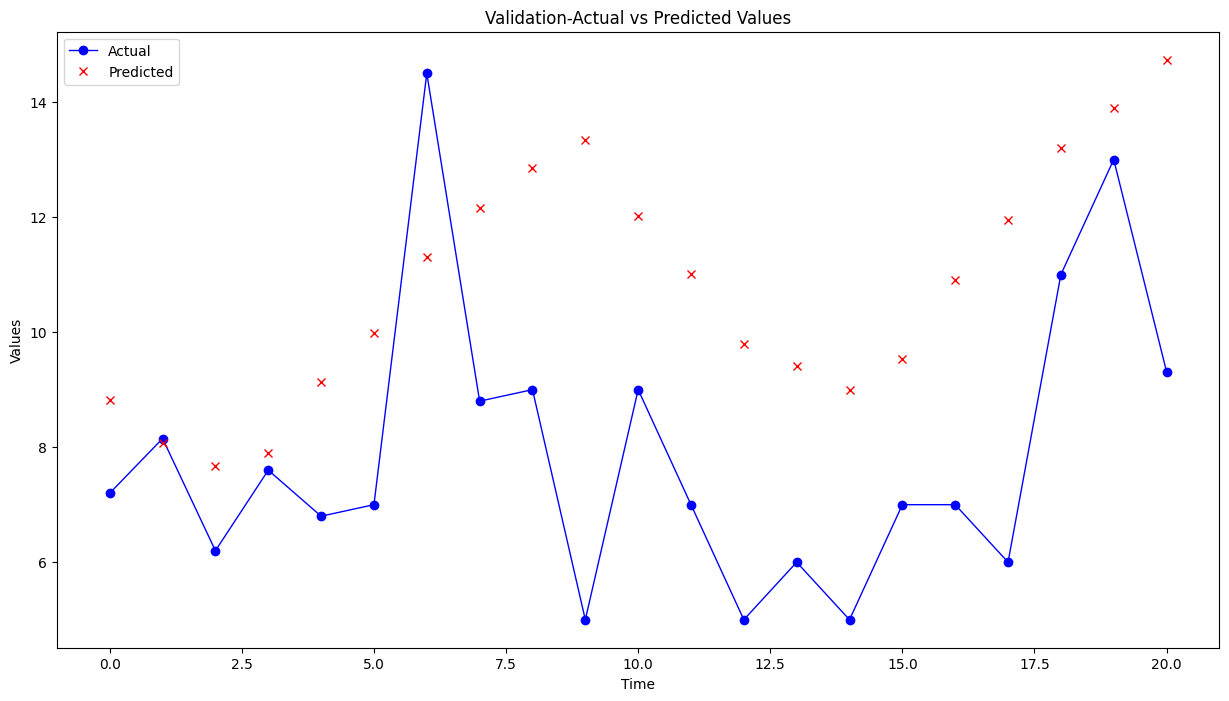

MAE: 3.2230
MSE: 13.9545
RMSE: 3.7356
MAPE: 0.2902
MASE: 3.819121162371691
1/1 [==============================] - 0s 49ms/step


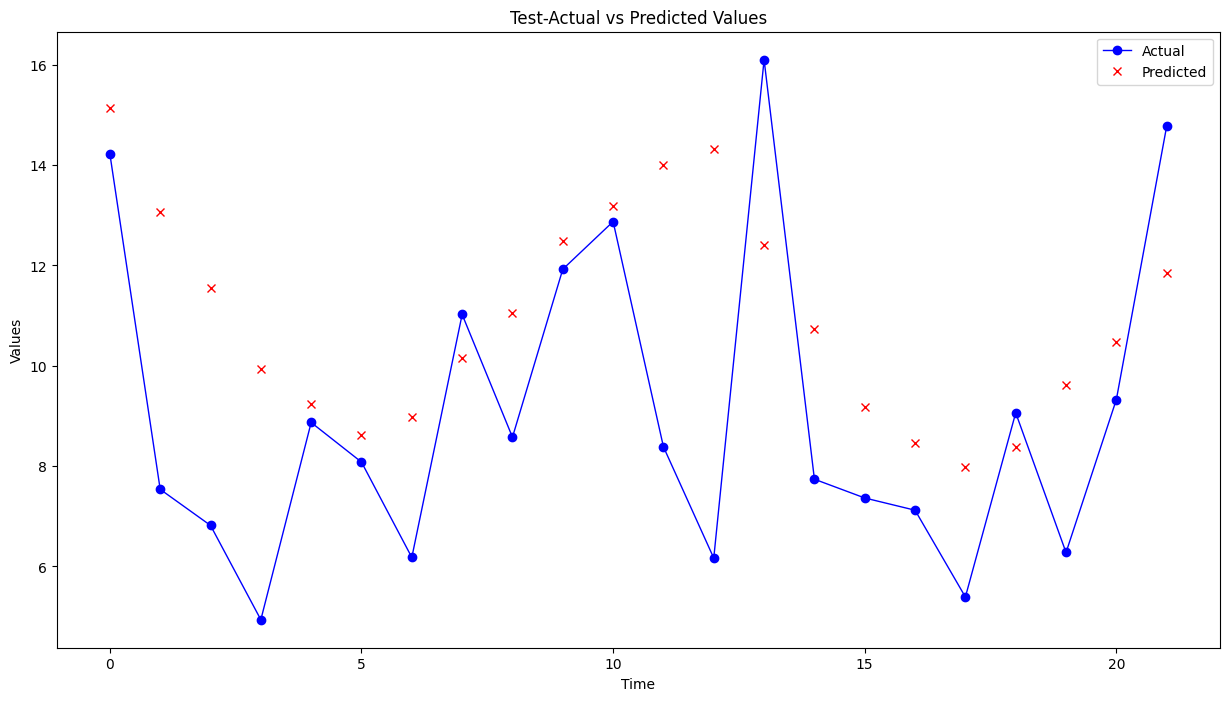

MAE: 2.6549
MSE: 11.2766
RMSE: 3.3581
MAPE: 0.2365
MASE: 2.487134556679763


In [11]:
# # Train and Evolve

# Hourly
dl.lstm_train_and_evaluate(df_hourly)

# Daily
dl.lstm_train_and_evaluate(df_daily, 'D')

# Weekly
dl.lstm_train_and_evaluate(df_weekly, 'W')

# Monthly
dl.lstm_train_and_evaluate(df_monthly, 'M')


In [12]:
# Hyperparamater Tuning 

# # Hourly
# hourly_best_model, hourly_best_hp = dl.lstm_tune_and_evolve(df_hourly)

In [13]:

# # Daily
#daily_best_model, daily_best_hp = dl.lstm_tune_and_evolve(df_daily, 'D')

In [14]:

# # Weekly
#weekly_best_model, weekly_best_hp = dl.lstm_tune_and_evolve(df_weekly, 'W')

In [15]:

# # Monthly
# monthly_best_model, monthly_best_hp = dl.lstm_tune_and_evolve(df_monthly, 'M')

# CNN 

* Best Model Train and Evolve 
* Hyperparamater with Keras-Tuner

{'Total Data Points': 87648, 'Training Data Size': 52573, 'Validation Data Size': 17524, 'Testing Data Size': 17526}
{'learning_rate': 0.00021997838024224393, 'num_layers': 2, 'units': [224, 256], 'activations': ['relu', 'tanh'], 'dropout': False}
Epoch 1/10
1643/1643 [==============================] - ETA: 0s - loss: 0.0023 - mean_absolute_error: 0.0249INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0249 - val_loss: 0.0010 - val_mean_absolute_error: 0.0166
Epoch 2/10
1637/1643 [============================>.] - ETA: 0s - loss: 0.0011 - mean_absolute_error: 0.0170INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0170 - val_loss: 8.8159e-04 - val_mean_absolute_error: 0.0141
Epoch 3/10
1641/1643 [============================>.] - ETA: 0s - loss: 9.5982e-04 - mean_absolute_error: 0.0146INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 9.5922e-04 - mean_absolute_error: 0.0146 - val_loss: 7.9165e-04 - val_mean_absolute_error: 0.0116
Epoch 4/10
1643/1643 [==============================] - 9s 6ms/step - loss: 8.9530e-04 - mean_absolute_error: 0.0135 - val_loss: 8.2246e-04 - val_mean_absolute_error: 0.0122
Epoch 5/10
1635/1643 [============================>.] - ETA: 0s - loss: 8.6654e-04 - mean_absolute_error: 0.0130INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 8.6717e-04 - mean_absolute_error: 0.0130 - val_loss: 7.7700e-04 - val_mean_absolute_error: 0.0113
Epoch 6/10
1643/1643 [==============================] - ETA: 0s - loss: 8.2912e-04 - mean_absolute_error: 0.0123INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 8.2912e-04 - mean_absolute_error: 0.0123 - val_loss: 7.3221e-04 - val_mean_absolute_error: 0.0105
Epoch 7/10
1643/1643 [==============================] - 9s 6ms/step - loss: 8.1477e-04 - mean_absolute_error: 0.0119 - val_loss: 7.4905e-04 - val_mean_absolute_error: 0.0108
Epoch 8/10
1643/1643 [==============================] - 9s 6ms/step - loss: 7.9399e-04 - mean_absolute_error: 0.0115 - val_loss: 7.5562e-04 - val_mean_absolute_error: 0.0115
Epoch 9/10
1643/1643 [==============================] - 9s 6ms/step - loss: 7.7746e-04 - mean_absolute_error: 0.0111 - val_loss: 7.4417e-04 - val_mean_absolute_error: 0.0108
Epoch 10/10
1637/1643 [============================>.] - ETA: 0s - loss: 7.6562e-04 - mean_absolute_error: 0.0110INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


548/548 [==============================] - 1s 2ms/step


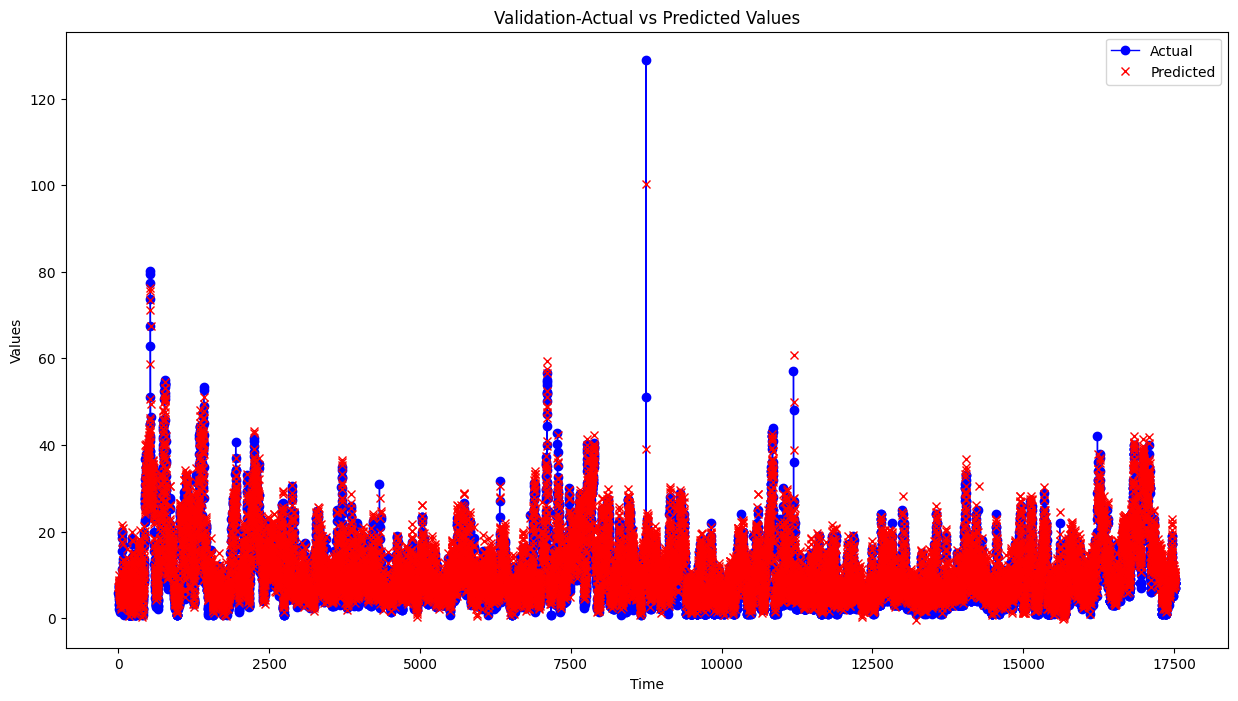

MAE: 1.9688
MSE: 7.1434
RMSE: 2.6727
MAPE: 0.2217
MASE: 1.0094946515546552
548/548 [==============================] - 1s 2ms/step


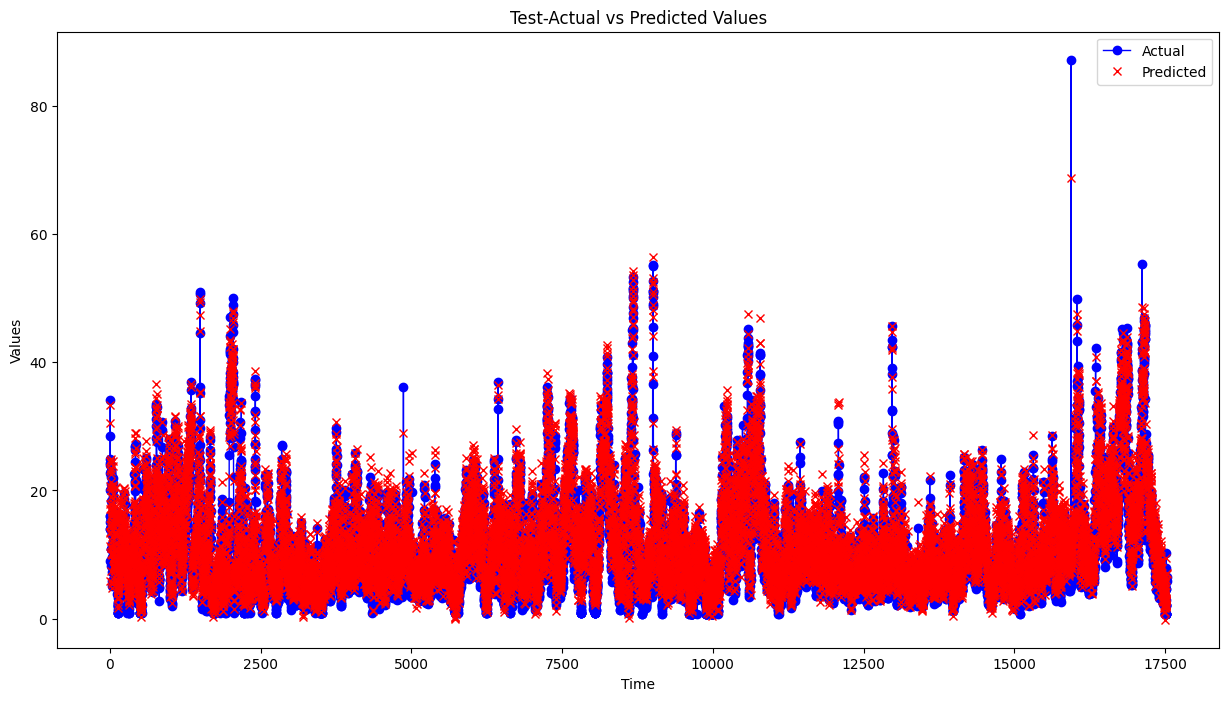

MAE: 1.9246
MSE: 6.6431
RMSE: 2.5774
MAPE: 0.2130
MASE: 0.9887460304524368
{'Total Data Points': 3652, 'Training Data Size': 2172, 'Validation Data Size': 724, 'Testing Data Size': 725}
{'learning_rate': 0.0012918827423762096, 'num_layers': 5, 'units': [96, 448, 96, 512, 320], 'activations': ['tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
68/68 [==============================] - ETA: 0s - loss: 0.1135 - mean_absolute_error: 0.2159INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 2s 17ms/step - loss: 0.1135 - mean_absolute_error: 0.2159 - val_loss: 0.0156 - val_mean_absolute_error: 0.0889
Epoch 2/10
65/68 [===========================>..] - ETA: 0s - loss: 0.0181 - mean_absolute_error: 0.1018INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 1s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.1018 - val_loss: 0.0139 - val_mean_absolute_error: 0.0888
Epoch 3/10
65/68 [===========================>..] - ETA: 0s - loss: 0.0126 - mean_absolute_error: 0.0824INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 1s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0823 - val_loss: 0.0108 - val_mean_absolute_error: 0.0798
Epoch 4/10
68/68 [==============================] - 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0787 - val_loss: 0.0139 - val_mean_absolute_error: 0.0837
Epoch 5/10
68/68 [==============================] - 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0811 - val_loss: 0.0137 - val_mean_absolute_error: 0.0868
Epoch 6/10
68/68 [==============================] - 0s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0742 - val_loss: 0.0125 - val_mean_absolute_error: 0.0871
Epoch 7/10
68/68 [==============================] - 1s 8ms/step - loss: 0.0089 - mean_absolute_error: 0.0674 - val_loss: 0.0135 - val_mean_absolute_error: 0.0915
Epoch 8/10
68/68 [==============================] - 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0716 - val_loss: 0.0114 - val_mean_absolute_error: 0.0826
Epoch 9/10
62/68 [====================

INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 1s 13ms/step - loss: 0.0099 - mean_absolute_error: 0.0727 - val_loss: 0.0099 - val_mean_absolute_error: 0.0774
Epoch 10/10
63/68 [==========================>...] - ETA: 0s - loss: 0.0085 - mean_absolute_error: 0.0656INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


23/23 [==============================] - 0s 3ms/step


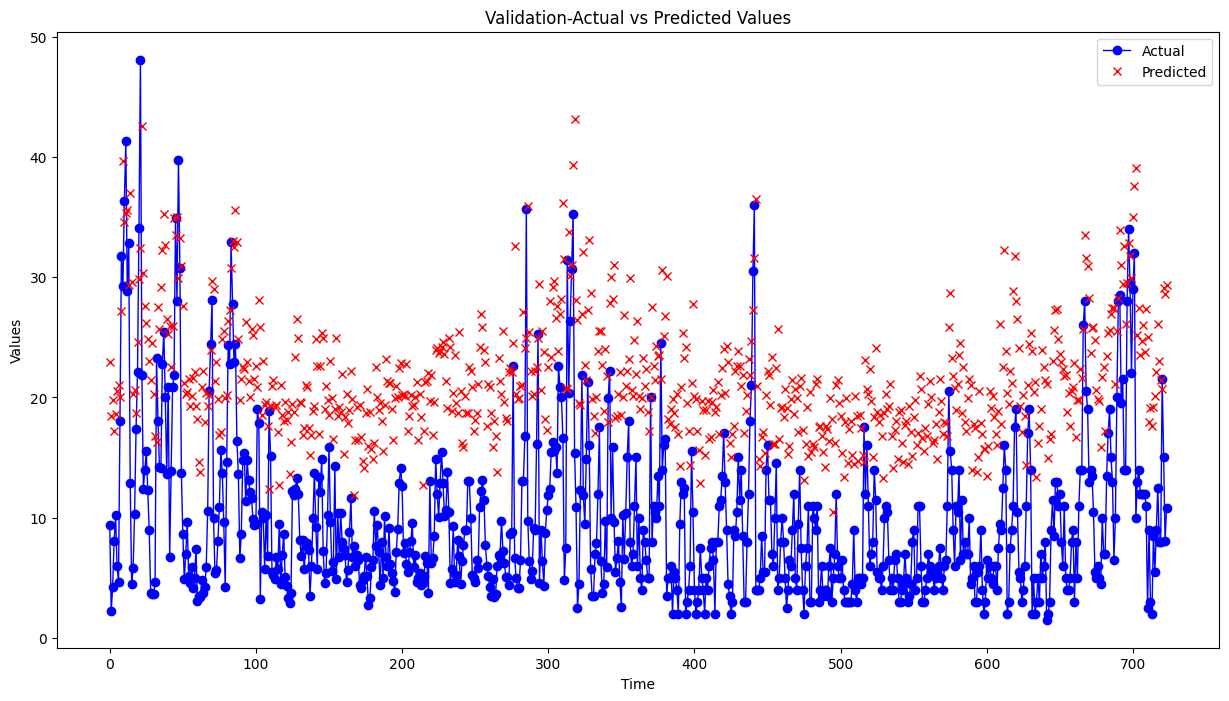

MAE: 12.0988
MSE: 167.8568
RMSE: 12.9560
MAPE: 0.5783
MASE: 4.025297450811216
23/23 [==============================] - 0s 3ms/step


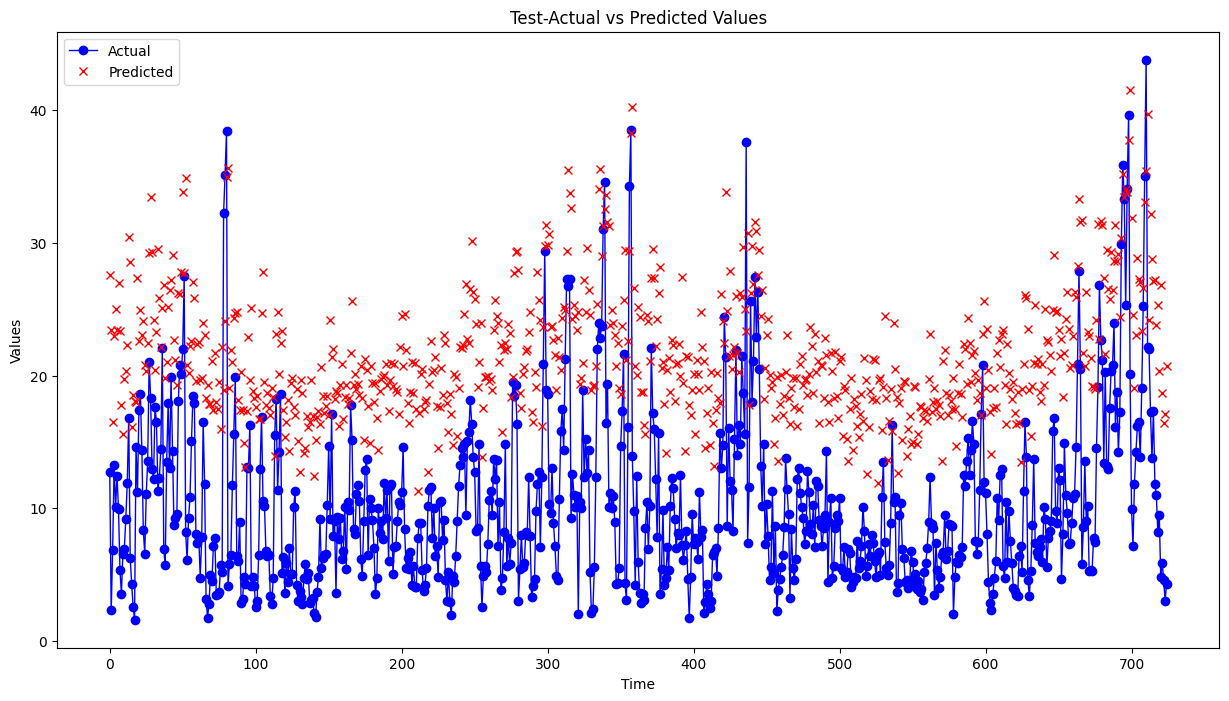

MAE: 11.4707
MSE: 151.5537
RMSE: 12.3107
MAPE: 0.5490
MASE: 3.814630680938638
{'Total Data Points': 522, 'Training Data Size': 281, 'Validation Data Size': 93, 'Testing Data Size': 95}
{'learning_rate': 0.0031087381681937547, 'num_layers': 4, 'units': [96, 32, 96, 96], 'activations': ['tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 0.3120 - mean_absolute_error: 0.4384INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


9/9 [==============================] - 1s 68ms/step - loss: 0.3120 - mean_absolute_error: 0.4384 - val_loss: 0.0803 - val_mean_absolute_error: 0.2166
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 0.1254 - mean_absolute_error: 0.2848 - val_loss: 0.1142 - val_mean_absolute_error: 0.2869
Epoch 3/10
1/9 [==>...........................] - ETA: 0s - loss: 0.1014 - mean_absolute_error: 0.2635INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


9/9 [==============================] - 0s 46ms/step - loss: 0.0773 - mean_absolute_error: 0.2224 - val_loss: 0.0580 - val_mean_absolute_error: 0.1865
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0592 - mean_absolute_error: 0.1926 - val_loss: 0.0626 - val_mean_absolute_error: 0.2028
Epoch 5/10
1/9 [==>...........................] - ETA: 0s - loss: 0.0589 - mean_absolute_error: 0.1909INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


9/9 [==============================] - 0s 46ms/step - loss: 0.0549 - mean_absolute_error: 0.1797 - val_loss: 0.0527 - val_mean_absolute_error: 0.1844
Epoch 6/10
1/9 [==>...........................] - ETA: 0s - loss: 0.0447 - mean_absolute_error: 0.1698INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


9/9 [==============================] - 0s 46ms/step - loss: 0.0484 - mean_absolute_error: 0.1712 - val_loss: 0.0432 - val_mean_absolute_error: 0.1588
Epoch 7/10
1/9 [==>...........................] - ETA: 0s - loss: 0.0457 - mean_absolute_error: 0.1644INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


9/9 [==============================] - 0s 45ms/step - loss: 0.0468 - mean_absolute_error: 0.1669 - val_loss: 0.0418 - val_mean_absolute_error: 0.1572
Epoch 8/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0442 - mean_absolute_error: 0.1622 - val_loss: 0.0442 - val_mean_absolute_error: 0.1559
Epoch 9/10
9/9 [==============================] - 0s 11ms/step - loss: 0.0451 - mean_absolute_error: 0.1626 - val_loss: 0.0450 - val_mean_absolute_error: 0.1562
Epoch 10/10
1/9 [==>...........................] - ETA: 0s - loss: 0.0449 - mean_absolute_error: 0.1607INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


3/3 [==============================] - 0s 7ms/step


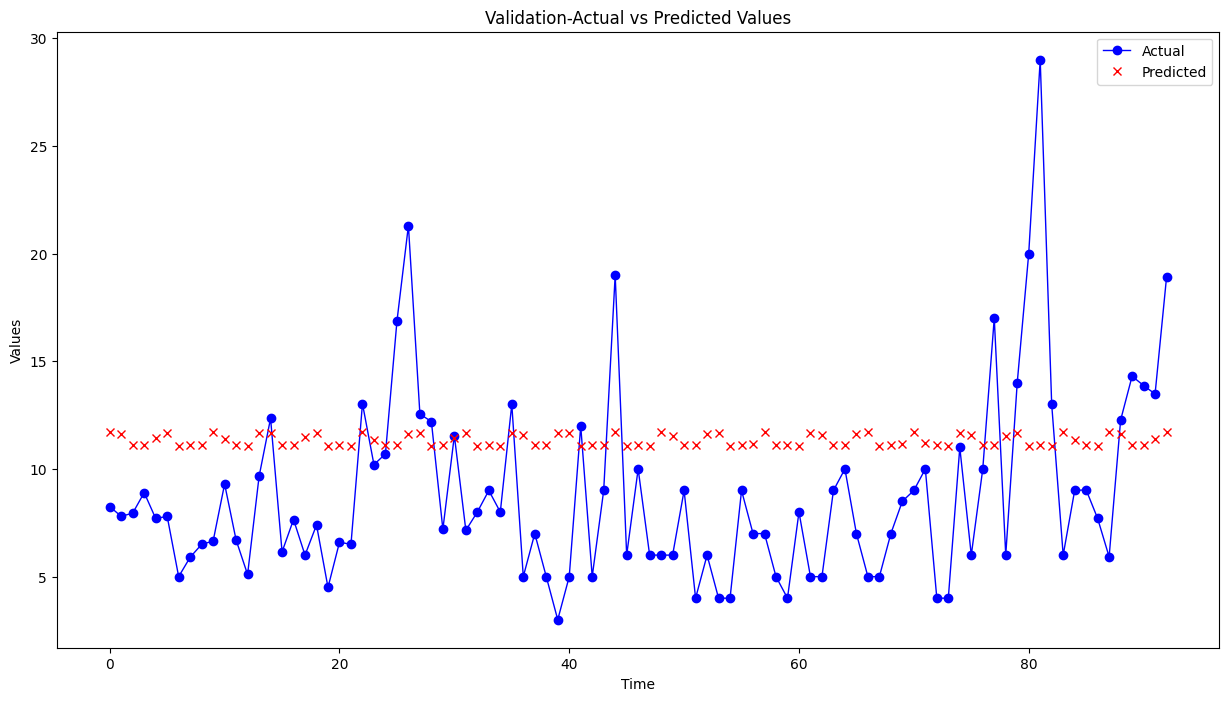

MAE: 4.3011
MSE: 25.4847
RMSE: 5.0482
MAPE: 0.3798
MASE: 15.499376474996927
3/3 [==============================] - 0s 8ms/step


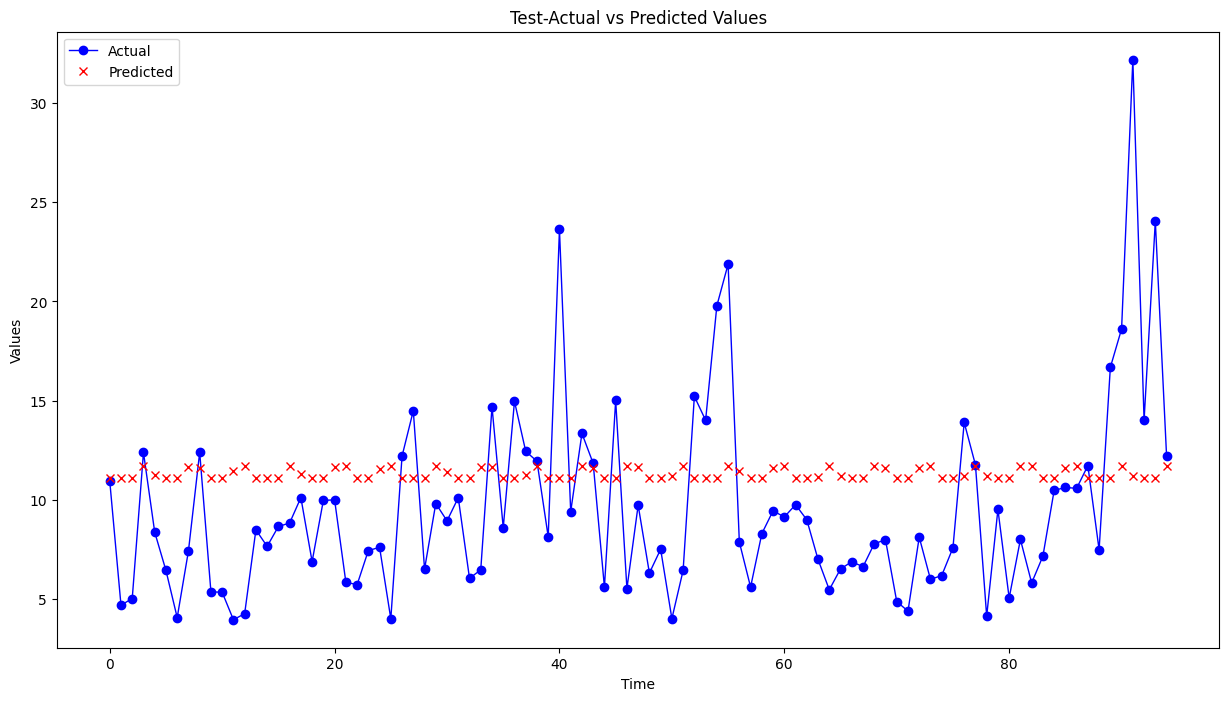

MAE: 4.1472
MSE: 26.5205
RMSE: 5.1498
MAPE: 0.3676
MASE: 14.892136905860356
{'Total Data Points': 120, 'Training Data Size': 64, 'Validation Data Size': 21, 'Testing Data Size': 22}
{'learning_rate': 0.0006346833837140555, 'num_layers': 6, 'units': [224, 384, 96, 64, 96, 32], 'activations': ['relu', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': False}
Epoch 1/10
1/2 [==============>...............] - ETA: 0s - loss: 0.3633 - mean_absolute_error: 0.5163INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 1s 506ms/step - loss: 0.3001 - mean_absolute_error: 0.4599 - val_loss: 0.1203 - val_mean_absolute_error: 0.2888
Epoch 2/10
1/2 [==============>...............] - ETA: 0s - loss: 0.1338 - mean_absolute_error: 0.3114INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 389ms/step - loss: 0.1139 - mean_absolute_error: 0.2786 - val_loss: 0.1011 - val_mean_absolute_error: 0.2580
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0921 - mean_absolute_error: 0.2426INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 391ms/step - loss: 0.0848 - mean_absolute_error: 0.2309 - val_loss: 0.0877 - val_mean_absolute_error: 0.2307
Epoch 4/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0693 - mean_absolute_error: 0.2098INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 391ms/step - loss: 0.0725 - mean_absolute_error: 0.2168 - val_loss: 0.0714 - val_mean_absolute_error: 0.2148
Epoch 5/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0640 - mean_absolute_error: 0.2082INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 397ms/step - loss: 0.0568 - mean_absolute_error: 0.1926 - val_loss: 0.0419 - val_mean_absolute_error: 0.1620
Epoch 6/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0426 - mean_absolute_error: 0.1590INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 383ms/step - loss: 0.0409 - mean_absolute_error: 0.1575 - val_loss: 0.0403 - val_mean_absolute_error: 0.1577
Epoch 7/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0372 - mean_absolute_error: 0.1529INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 1s 549ms/step - loss: 0.0399 - mean_absolute_error: 0.1548 - val_loss: 0.0359 - val_mean_absolute_error: 0.1524
Epoch 8/10
2/2 [==============================] - 0s 22ms/step - loss: 0.0390 - mean_absolute_error: 0.1519 - val_loss: 0.0382 - val_mean_absolute_error: 0.1559
Epoch 9/10
2/2 [==============================] - 0s 22ms/step - loss: 0.0348 - mean_absolute_error: 0.1431 - val_loss: 0.0364 - val_mean_absolute_error: 0.1472
Epoch 10/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0282 - mean_absolute_error: 0.1242INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


1/1 [==============================] - 0s 49ms/step


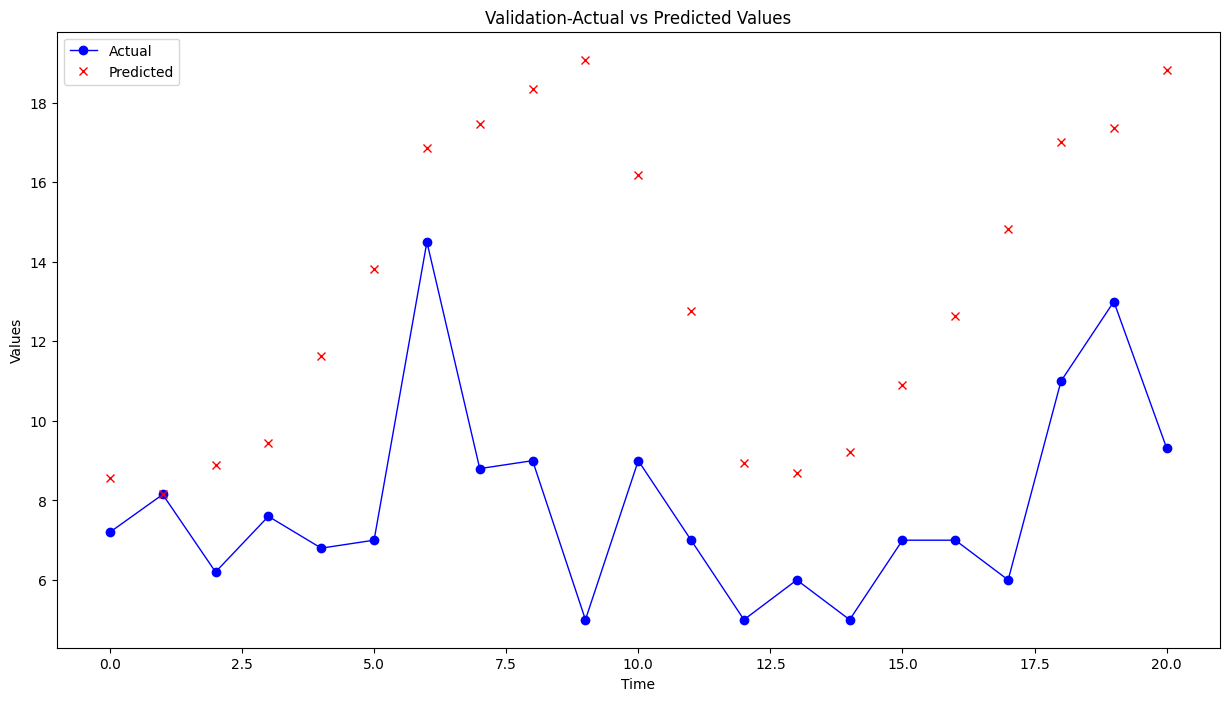

MAE: 5.4315
MSE: 40.2138
RMSE: 6.3414
MAPE: 0.3840
MASE: 3.410322487567164
1/1 [==============================] - 0s 27ms/step


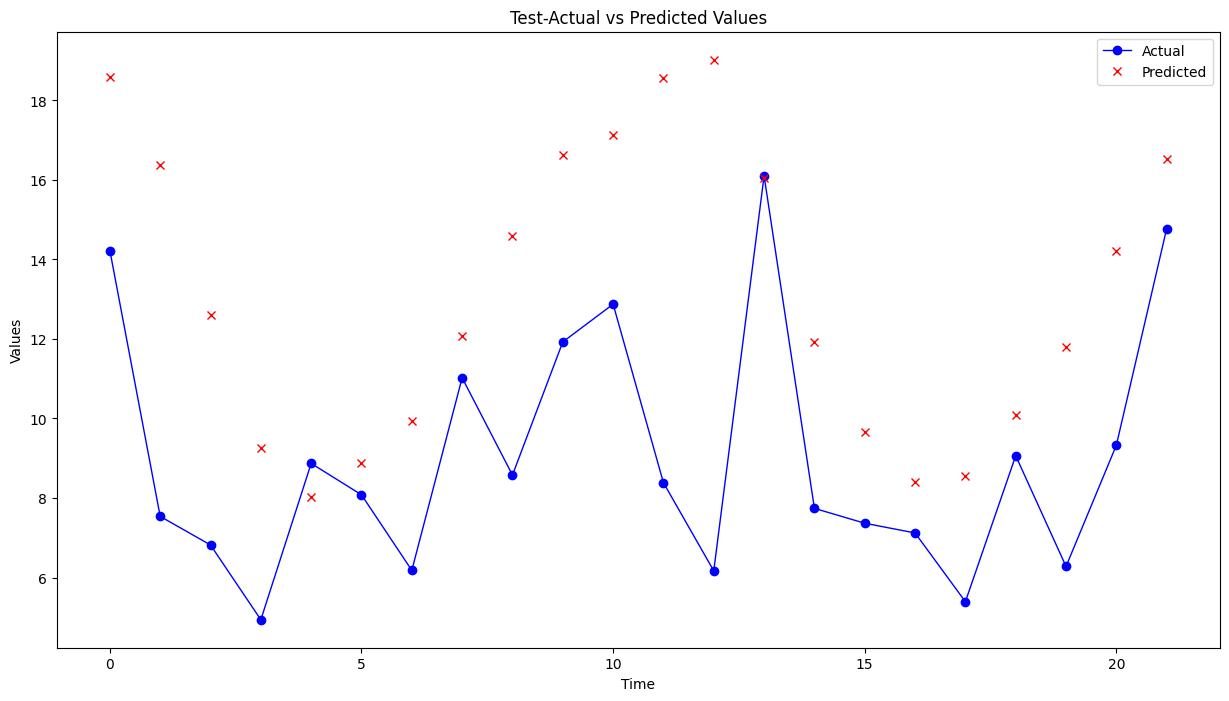

MAE: 4.1782
MSE: 27.4635
RMSE: 5.2406
MAPE: 0.3027
MASE: 2.176420087534995


In [16]:
# Train and Evolve

# Hourly
dl.cnn_train_and_evaluate(df_hourly)

# Daily
dl.cnn_train_and_evaluate(df_daily, 'D')

# Weekly
dl.cnn_train_and_evaluate(df_weekly, 'W')

# Monthly
dl.cnn_train_and_evaluate(df_monthly, 'M')

In [17]:
# Hyperparamater Tuning 

# # Hourly
# hourly_best_model, hourly_best_hp = dl.cnn_tune_and_evolve(df_hourly)

In [18]:
# # Daily
#daily_best_model, daily_best_hp = dl.cnn_tune_and_evolve(df_daily, 'D')

In [19]:
# # Weekly
# weekly_best_model, weekly_best_hp = dl.cnn_tune_and_evolve(df_weekly, 'W')

In [20]:
# # Monthly
# monthly_best_model, monthly_best_hp = dl.cnn_tune_and_evolve(df_monthly, 'M')